# 1. The inverse transform

There is a simple, sometimes useful transformation, known as the probability integral transform, that allows us to transform any random variable into a uniform random variable and, more importantly, vice versa. For example, if X has density f and cdf F, then we have the relation

$$F(x) = \int_{-\infty}^{x} f(x)dx$$

and if we set $U = F(X)$, then $U$ is a random variable distributed from a uniform $\mathcal{U}(0, 1)$. This is because

$$P(U \leq u) = P[F(X)\leq F(x) ] = P[F^{-1}(F(X))\leq  F^{-1}(F(x))] = P(X \leq x),$$

where we have assumed that $F$ has an inverse.

## Example: Exponential Distribution

If $X \sim Exp(1)$, then $F(x)=1-e^{-x}$. Solving for $x$ in $u=1-e^{-x}$ gives $x=-\log (1-u)$. Therefore, if $U\sim \mathcal{U}_{[0,1]}$, then 

$$X= - \log U \sim Exp(1)$$

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [102]:
rng = np.random.default_rng(12345)
U = rng.uniform(0, 1.0, size=100000)
U

array([0.22733602, 0.31675834, 0.79736546, ..., 0.30227381, 0.7802251 ,
       0.2300369 ], shape=(100000,))

In [103]:
X = -np.log(U)
X

array([1.48132608, 1.14961613, 0.22644216, ..., 1.19642202, 0.24817281,
       1.46951554], shape=(100000,))

/var/folders/_b/28jfj19121qf32rdzd8twc000000gn/T/ipykernel_27441/4082018789.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(); plt.tight_layout(); plt.show()


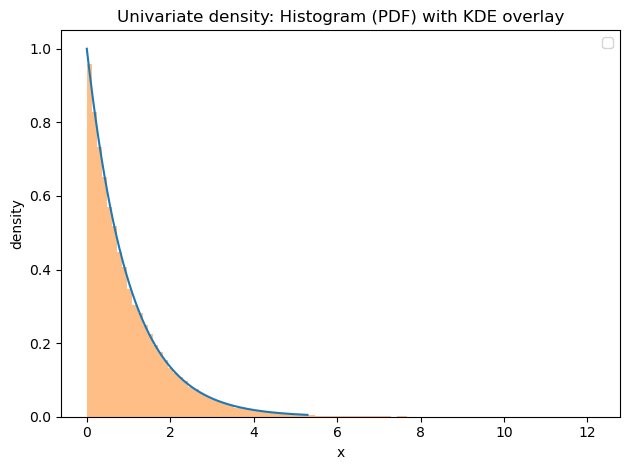

In [272]:
x = np.asarray(X, float)
kde = gaussian_kde(x)
grid = np.linspace(x.min(), np.percentile(x, 99.5), 600)                      
F = np.exp(- grid) 
plt.figure()
plt.plot(grid, F)
plt.hist(x, bins=100, density=True, alpha=0.5)
plt.xlabel("x"); plt.ylabel("density")
plt.title("Univariate density: Histogram (PDF) with KDE overlay")
plt.legend(); plt.tight_layout(); plt.show()

## Example: Logistic Distribution

$$pdf:f(x)=\frac{1}{\beta} \frac{e^{-(x-\mu)/\beta}}{[1+e^{-(x-\mu)/\beta}]^2}, \quad cdf: F(X)= \frac{1}{1+e^{-(x-\mu)/\beta}}$$

$$x = \mu- \beta \log(1/u-1)$$

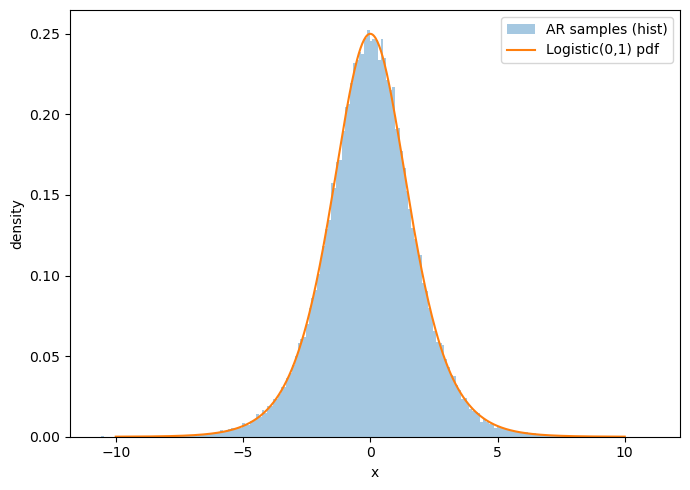

In [271]:
u = rng.random(100000)
mu =0
beta = 1
x= mu - beta * np.log(1/u-1)
def logistic_pdf(x, mu, beta):
    return 1/beta *np.exp(-(x-mu)/beta)/((1+np.exp(-(x-mu)/beta))**2)

def standard_pdf(x, mu, beta):
    return 1/(np.sqrt(np.pi)*beta)*np.exp(-((x-mu)/beta)**2)


grid = np.linspace(-10, 10, 600)
pdf = logistic_pdf(grid, mu, beta)
pdf2 = standard_pdf(grid, mu, beta)
plt.figure(figsize=(7,5))
plt.hist(x, bins=200, density=True, alpha=0.4,label="AR samples (hist)")
plt.plot(grid, pdf, label=f"Logistic({mu},{beta}) pdf")
#plt.plot(grid, pdf2, label=f"Standard({mu},{beta}) pdf")
plt.xlabel("x")
plt.ylabel("density")
plt.legend()
plt.tight_layout()
plt.show()

## Example: Cauchy Distribution

$$pdf: f(x)=\frac{1}{\pi \sigma} \frac{1}{1+(\frac{x-\mu}{\sigma})^2}, \quad cdf: F(x)=\frac{1}{2}+\frac{1}{\pi}\arctan((x-\mu)/\sigma)$$

$$x= \sigma \tan (\pi(u-1/2))+\mu$$

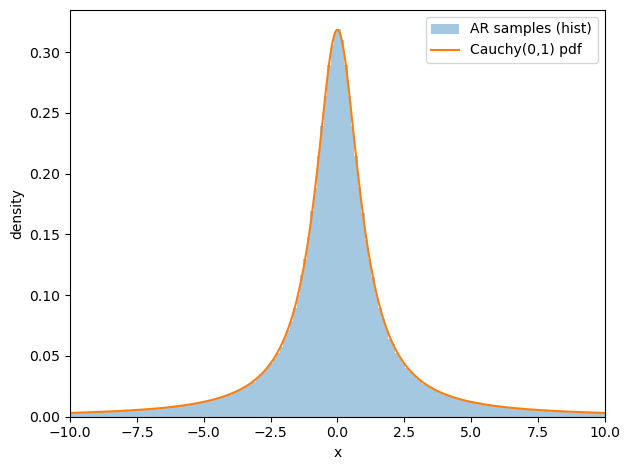

In [270]:
u = rng.random(1000000)
u = np.clip(u, 0.005, 0.995)
mu =0
sigma = 1
x= mu + sigma * np.tan(np.pi * (u-0.5) )
def cauchy_pdf(x, mu, sigma):
    return (1/(np.pi*sigma))* (1/(1+((x-mu)/sigma)**2))
    
def standard_pdf(x, mu, sigma):
    return 1/(np.sqrt(np.pi)*sigma)*np.exp(-((x-mu)/sigma)**2)


grid = np.linspace(-10, 10, 600)
pdf = cauchy_pdf(grid, mu, sigma)
pdf2 = standard_pdf(grid, mu, sigma)
kde1 = gaussian_kde(x)                
plt.figure()
plt.hist(x, bins=1000, density=True, alpha=0.4,label="AR samples (hist)")
plt.plot(grid, pdf, label=f"Cauchy({mu},{beta}) pdf")
plt.xlabel("x")
plt.xlim(-10,10)
plt.ylabel("density")
plt.legend()
plt.tight_layout()
plt.show()

# 2. General transformation methods

If the $X_{i}$'s are iid $\mathcal{Exp}(1)$ random variables, then three standard distributions can be derived as

$$ Y=2 \sum_{j=1}^{\nu} X_{j} \sim \chi^2_{2\nu}, \quad \nu \in \mathbb{N}^{*}$$

$$ Y=\frac{1}{\lambda} \sum_{j=1}^{\alpha} X_{j} \sim \mathcal{G}(\alpha,\lambda), \quad \alpha \in \mathbb{N}^{*}$$

$$ Y= \frac{\sum_{j=1}^{a} X_{j}}{\sum_{j=1}^{a+b} X_{j}} \sim \mathcal{Be}(a,b), \quad a,b \in \mathbb{N}^{*}$$

## Example: Chi-squared random variables

$$X \sim \mathcal{Exp}(\lambda):f(x;\lambda)=\lambda e^{-\lambda x}$$

$$ Y \sim \chi^2_{k}: f(y;k)=\frac{1}{2^{k/2}\Gamma(k/2)}y^{(k/2)-1}e^{-y/2}$$

$$ \mathcal{Exp}(1/2)= \chi^2_{2}$$

$$X \sim \mathcal{Exp}(1) \Rightarrow Y=1/\lambda \times X\sim \mathcal{Exp}(\lambda)$$

$$Y=1/\lambda \times X: f_{y}(y)=|\frac{\partial \lambda y}{\partial y}| \times f_{x}(\lambda y) = \lambda \times e^{-\lambda y} $$

$$ \Rightarrow 2 \times \mathcal{Exp}(1)=\mathcal{Exp}(1/2)=\chi^2_{2}$$

$$X_{1} \sim \chi^2_{k1}, \quad X_{2} \sim \chi^2_{k2} \Rightarrow T = X_{1}+X_{2} \sim \chi^2_{k1+k2}$$

$$T=X_{1}+X_{2}: f_{T}(t)=\int_{0}^{t}f_{x_{1}}(t)f_{x_{2}}(t-x_{1})dx_{1}= \frac{e^{-t/2}}{2^{(k_{1}+k_{2})/2}{\Gamma(k_{1}/2)\Gamma(k_{2}/2})} \int_{0}^{t}x_{1}^{k_{1}/2-1}(t-x_{1})^{k_{2}/2-1}dx_{1}$$

$$=\frac{e^{-t/2}}{2^{(k_{1}+k_{2})/2}{\Gamma(k_{1}/2)\Gamma(k_{2}/2})} t^{(k_{1}+k_{2})/2-1}\frac{\Gamma(k_{1}/2)\Gamma(k_{2}/2)}{\Gamma((k_{1}+k_{2})/2)}$$

$$=\frac{1}{2^{(k_{1}+k_{2})/2}\Gamma((k_{1}+k_{2})/2)} t^{(k_{1}+k_{2})/2-1}e^{-t/2}$$

Here we used that $B(z_{1},z_{2})=\int_{0}^{1}t^{z_{1}-1}(1-t)^{z_{2}-1}dt$

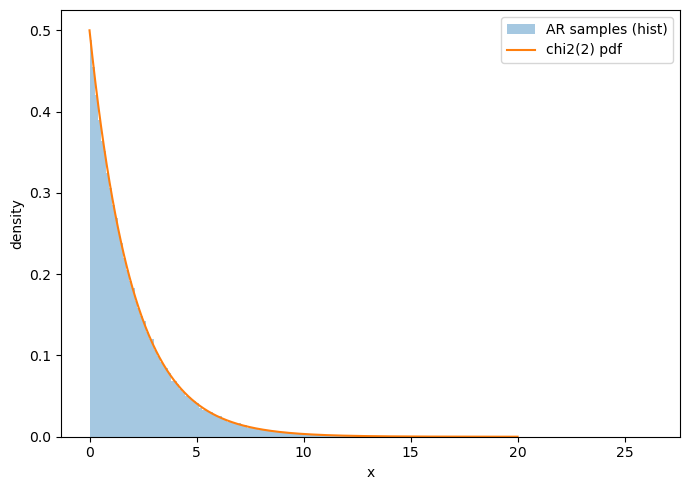

In [291]:
U = rng.random((100000, 1))
E = -np.log(U) 
Chi = 2* E.sum(axis=1)
grid = np.linspace(0, 20, 600)
k=2
def chi2_pdf(x, k):
    out = 1/(2**(k/2)*math.gamma(k/2))*x**((k/2)-1)*np.exp(-x/2)
    return out

pdf = chi2_pdf(grid, k)
plt.figure(figsize=(7,5))
plt.hist(Chi, bins=200, density=True, alpha=0.4,label="AR samples (hist)")
plt.plot(grid, pdf, label=f"chi2({k}) pdf")
plt.xlabel("x")
plt.ylabel("density")
plt.legend()
plt.tight_layout()
plt.show()

## Example: Gamma Distribution with $\alpha \in \mathbb{N}^{*}$

$$X \sim \mathcal{Exp}(\lambda):f(x;\lambda)=\lambda e^{-\lambda x}$$

$$ Y \sim \mathcal{G}(\alpha,\lambda): f(x;\alpha,\lambda)=\frac{\lambda^{\alpha}}{\Gamma(\alpha)}y^{\alpha-1}e^{-\lambda y}$$

$$ \mathcal{Exp}(1)= \mathcal{G}(1,1)$$

$$1/\lambda \times \mathcal{Exp}(1)= \mathcal{Exp}(\lambda)=\mathcal{G}(1,\lambda)$$

$$X_{1} \sim \mathcal{G}(\alpha_{1},\lambda), \quad X_{2} \sim \mathcal{G}(\alpha_{2},\lambda) \Rightarrow Y=X_{1}+X_{2} = \mathcal{G}(\alpha_{1}+\alpha_{2},\lambda)$$

$$f_{Y}(y)=\int_{0}^{y}f_{X_{1}}(x_{1})f_{X_{2}}(y-x_{1})dx_{1} = \int_{0}^{y} \frac{\lambda^{\alpha_{1}}}{\Gamma(\alpha_{1})}x_{1}^{\alpha-1}e^{-\lambda x_{1}}\frac{\lambda^{\alpha_{2}}}{\Gamma(\alpha_{2})}(y-x_{1})^{\alpha_{2}-1}e^{-\lambda (y-x_{1})}dx_{1}$$

$$= \frac{\lambda^{\alpha_{1}+\alpha_{2}}}{\Gamma(\alpha_{1})\Gamma(\alpha_{2})}e^{-\lambda y}\int_{0}^{y}x_{1}^{\alpha-1}(y-x_{1})^{\alpha_{2}-1} dx_{1}$$

$$u = x_{1}/y, \quad d u= d x_{1}/y, \quad x_{1})=uy$$

$$= \frac{\lambda^{\alpha_{1}+\alpha_{2}}}{\Gamma(\alpha_{1})\Gamma(\alpha_{2})}e^{-\lambda y}\int_{0}^{y}(uy)^{\alpha-1}(y-uy)^{\alpha_{2}-1} du /y=\frac{\lambda^{\alpha_{1}+\alpha_{2}}}{\Gamma(\alpha_{1})\Gamma(\alpha_{2})}e^{-\lambda y}y^{\alpha_{1}+\alpha_{2}-1}\int_{0}^{y}(u)^{\alpha-1}(1-u)^{\alpha_{2}-1} du $$

$$ = \frac{\lambda^{\alpha_{1}+\alpha_{2}}}{\Gamma(\alpha_{1})\Gamma(\alpha_{2})}e^{-\lambda y}y^{\alpha_{1}+\alpha_{2}-1} \frac{\Gamma(\alpha_{1}\Gamma(\alpha_{2}}{\Gamma(\alpha_{1}+\alpha_{2}}=  \frac{\lambda^{\alpha_{1}+\alpha_{2}}}{\Gamma(\alpha_{1}+\alpha_{2})}e^{-\lambda y}y^{\alpha_{1}+\alpha_{2}-1} \sim \mathcal{G}(\alpha_{1}+\alpha_{2},\lambda)$$

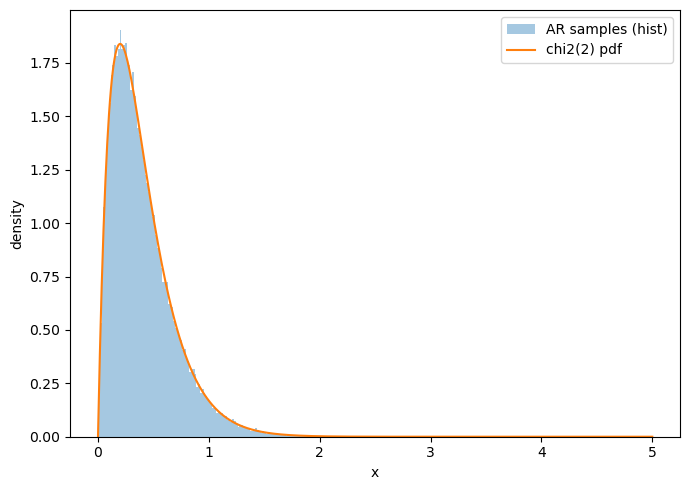

In [307]:
U = rng.random((100000, 2))
E = -np.log(U) 
Chi = 1/5* E.sum(axis=1)
grid = np.linspace(0, 5, 600)
a=2
l=5
def gamma_pdf(x, a,l):
    out = 1/math.gamma(a)*l**a*x**(a-1)*np.exp(-l*x)
    return out

pdf = gamma_pdf(grid, a,l)
plt.figure(figsize=(7,5))
plt.hist(Chi, bins=200, density=True, alpha=0.4,label="AR samples (hist)")
plt.plot(grid, pdf, label=f"chi2({k}) pdf")
plt.xlabel("x")
plt.ylabel("density")
plt.legend()
plt.tight_layout()
plt.show()

## Example: Beta Distribution with $a,b \in \mathbf{N}^{*}$

$$X \sim \mathcal{Exp}(\lambda):f(x;\lambda)=\lambda e^{-\lambda x}$$

$$ Y= \frac{\sum_{j=1}^{a} X_{j}}{\sum_{j=1}^{a+b} X_{j}}= \frac{\mathcal{G}(a,\lambda)}{\mathcal{G}(a,\lambda)+\mathcal{G}(b,\lambda)} \sim \mathcal{Be}(a,b), \quad a,b \in \mathbb{N}^{*}$$

$$Y= \frac{U}{U+V}= \frac{U}{T},\quad T=U+V,\quad  U=YT,\quad V(1-Y)T$$

$$J = \det \begin{pmatrix}\frac{\partial U}{\partial Y} & \frac{\partial U}{\partial T} \\ \frac{\partial V}{\partial Y} & \frac{\partial V}{\partial T}\end{pmatrix}  = \det \begin{pmatrix}T &Y \\ -T & 1-Y\end{pmatrix}= T[(1-Y)+Y]=T$$

$$ f_{Y,T}(y,t)=f_{U,V}(yt,(1-y)t)|J|= \frac{\lambda^{a}}{\Gamma(a)}(yt)^{a-1}e^{-\lambda y t} \frac{\lambda^{b}}{\Gamma(b)}((1-y)t)^{b-1}e^{-\lambda(1-y)t}t$$

$$ =\frac{\lambda^{a+b}}{\Gamma(a)\Gamma(b)}y^{a-1}(1-y)^{b-1}t^{a+b-1}e^{-\lambda t}= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}y^{a-1}(1-y)^{b-1} \times \frac{\lambda^{a+b}}{\Gamma(a+b)}t^{a+b-1}e^{-\lambda t} $$

$$ = \mathcal{Be}(a,b) \times \mathcal{G}(a+b,1)$$

/var/folders/_b/28jfj19121qf32rdzd8twc000000gn/T/ipykernel_27441/2324028245.py:11: RuntimeWarning: divide by zero encountered in log
  return np.exp((a - 1) * np.log(x) + (b - 1) * np.log(1 - x) - logB)


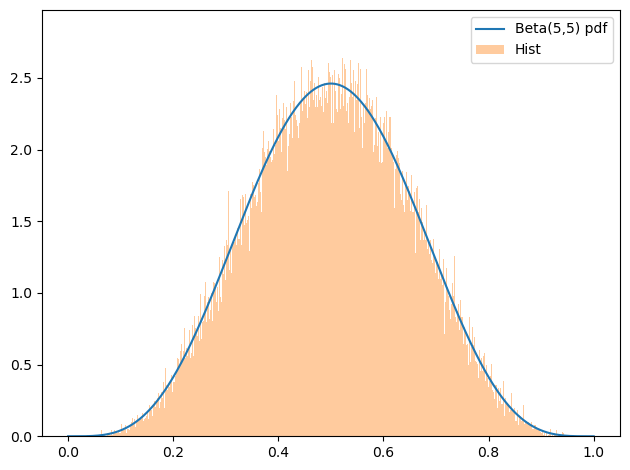

In [306]:
U1 = rng.random((100000,5))
X1 = -np.log(U1)
U1 = X1.sum(axis=1)
U2=  rng.random((100000,5))
X2 = -np.log(U2)
U2 = X2.sum(axis=1)
B = U1/(U1+U2)

def beta_pdf(x, a, b):
    logB = math.lgamma(a) + math.lgamma(b) - math.lgamma(a + b)
    return np.exp((a - 1) * np.log(x) + (b - 1) * np.log(1 - x) - logB)
    
a, b = 5, 5
pdf = beta_pdf(grid, a, b)
x = np.asarray(B, float)
grid = np.linspace(0, 1, 600)           
              
plt.figure()
plt.plot(grid, pdf, label=f"Beta({a},{b}) pdf")
plt.hist(x, bins=1000, density=True, alpha=0.4, label="Hist")
plt.legend(); plt.tight_layout(); plt.show()

## Example: A normal generator

If $U_{1}$ and $U_{2}$ are iid $\mathcal{U}_{[0,1]}$, the variables $X_{1}$ and $X_{2}$ defined by

$$X_{1} = \sqrt{-2 \log(U_{1})} \cos(2\pi U_{2}), \quad X_{2}= \sqrt{-2 \log(U_{1})} \sin(2\pi U_{2}),$$

are then iid $\mathcal{N}(0,1)$ by virtue of a simple change of variable argument.

In [137]:
U = rng.random((1000000,2))
X1 = np.sqrt(-2 * np.log(U[:,0]))*np.cos(2 * np.pi * U[:,1])
X2 = np.sqrt(-2 * np.log(U[:,0]))*np.sin(2 * np.pi * U[:,1])

/var/folders/_b/28jfj19121qf32rdzd8twc000000gn/T/ipykernel_27441/2435518636.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(); plt.tight_layout(); plt.show()


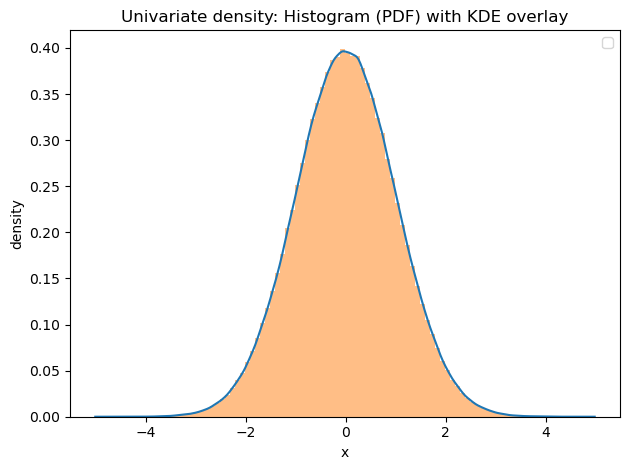

In [138]:
x = np.asarray(X1, float)
kde = gaussian_kde(x)
grid = np.linspace(x.min(), np.percentile(x, 99.99999), 600)                      
plt.figure()
plt.plot(grid, kde(grid))
plt.hist(x, bins=100, density=True, alpha=0.5)
plt.xlabel("x"); plt.ylabel("density")
plt.title("Univariate density: Histogram (PDF) with KDE overlay")
plt.legend(); plt.tight_layout(); plt.show()

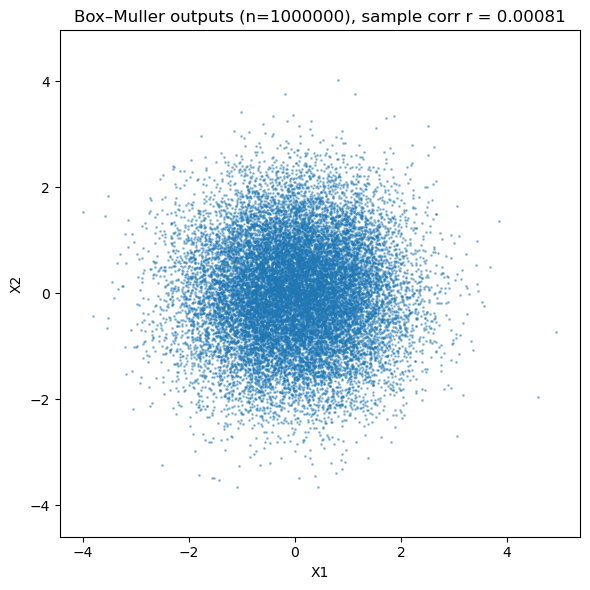

In [140]:
# 1) Downsample for plotting speed/visibility
rng_plot = np.random.default_rng(0)
idx = rng_plot.choice(len(X1), size=20000, replace=False)

plt.figure(figsize=(6,6))
plt.scatter(X1[idx], X2[idx], s=1, alpha=0.4)
r = np.corrcoef(X1, X2)[0, 1]
plt.title(f"Box–Muller outputs (n={len(X1)}), sample corr r = {r:.5f}")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.tight_layout()
plt.show()

## Correlated Normal Distribution

$$Z_{1} = \sqrt{-2 \ln U_{1}} \cos(2\pi U_{2}), \quad Z_{2}=\sqrt{-2\ln U_{1}} \sin (2\pi U_{2})$$

$$\Sigma = \begin{pmatrix}1 & \rho \\ \rho & 1\end{pmatrix}= LL^{T}= \begin{pmatrix}l_{11} & 0 \\ l_{12} & l_{22}\end{pmatrix} \begin{pmatrix}l_{11} & l_{12} \\ 0 & l_{22}\end{pmatrix} \Rightarrow L = \begin{pmatrix}1 & 0 \\ \rho & \sqrt{1-\rho^2}\end{pmatrix}$$

$$ X = LZ \Rightarrow \begin{pmatrix}X_{1} \\ X_{2} \end{pmatrix} = \begin{pmatrix}1 & 0 \\ \rho & \sqrt{1-\rho^2}\end{pmatrix}\begin{pmatrix}Z_{1} \\ Z_{2} \end{pmatrix}$$

$$X_{1}=Z_{1}, \quad X_{2} = \rho Z_{1}+\sqrt{1-\rho^2}Z_{2}$$

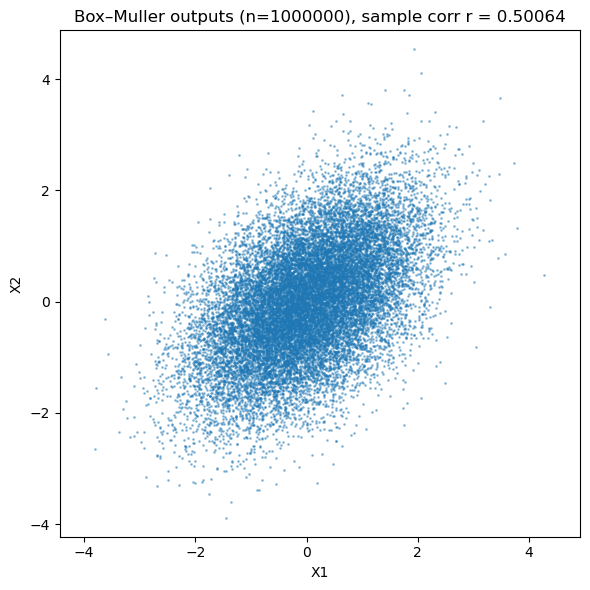

In [336]:
U = rng.random((1000000,2))
X1 = np.sqrt(-2 * np.log(U[:,0]))*np.cos(2 * np.pi * U[:,1])
X2 = np.sqrt(-2 * np.log(U[:,0]))*np.sin(2 * np.pi * U[:,1])
rho = 0.5
X2 = rho *X1 + np.sqrt((1-rho**2)) * X2
# 1) Downsample for plotting speed/visibility
rng_plot = np.random.default_rng(0)
idx = rng_plot.choice(len(X1), size=20000, replace=False)

plt.figure(figsize=(6,6))
plt.scatter(X1[idx], X2[idx], s=1, alpha=0.4)
r = np.corrcoef(X1, X2)[0, 1]
plt.title(f"Box–Muller outputs (n={len(X1)}), sample corr r = {r:.5f}")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.tight_layout()
plt.show()

## Mixture representation

It is sometimes the case that a probability distribution can be naturally represented as a mixture distribution; that is, we can write it in the form

$$ f(x)=\int_{\mathcal{Y}}g(x|y)f(y)dy \quad \text{or} \quad f(x)= \sum _{i\in \mathcal{Y}}p_{i}f_{i}(x)$$

depending on whether the auxiliary space $\mathcal{y}$ is continuous or discrete where $g$ and $p$ are standard distributions that can be easily simulated. To generate a random variable $X$ using such a representation, we can first generate a variable $Y$ from the mixing distribution and then generate $X$ from the selected conditiondal distribution.

For instance, we can write Student's $t$ density with $\nu$ degreesa of freedom $\mathcal{T}_{\nu}$ as a mixture, where

$$ X|Y \sim N(0,\nu/y) \quad \text{and} \quad Y \sim \chi^2_{\nu}$$

Generating from a $\mathcal{T}_{\nu}$ distribution could then amount to generating from a $\chi^2_{\nu}$ distribution and then from the corresponding normal distribution.

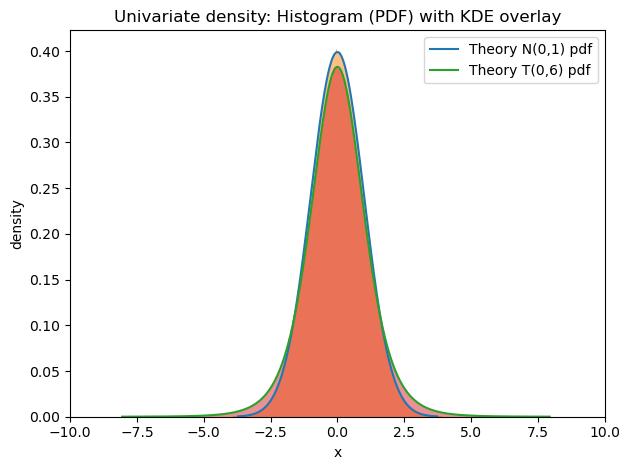

In [333]:
U = rng.random((10000000,2))
U2 = rng.random((10000000, 3))
E = -np.log1p(-U2) 
Chi = 2* E.sum(axis=1)
X1 = np.sqrt(-2 * np.log(U[:,0]))*np.cos(2 * np.pi * U[:,1])
X2 = np.sqrt(-2 * np.log(U[:,0]))*np.cos(2 * np.pi * U[:,1])*np.sqrt(6/Chi)

def standardnormal_pdf(x):
    return 1/(np.sqrt(2 *np.pi))*np.exp(-x**2/2)

def t_pdf(x,nu):
    return math.gamma((nu+1)/2)/(np.sqrt(np.pi * nu)*math.gamma(nu/2))*(1+x**2/nu)**(-(nu+1)/2)

x1 = np.asarray(X1, float)
grid1 = np.linspace(np.percentile(x1, 0.01), np.percentile(x1, 99.99), 600)
pdf1 = standardnormal_pdf(grid1)

x2 = np.asarray(X2, float)
grid2 = np.linspace(np.percentile(x2, 0.01), np.percentile(x2, 99.99), 600)    
pdf2 = t_pdf(grid2, 6)
plt.figure()
plt.plot(grid1, pdf1,label="Theory N(0,1) pdf")
plt.hist(x1, bins=1000, density=True, alpha=0.5)                   
plt.plot(grid2, pdf2,label="Theory T(0,6) pdf")
plt.hist(x2, bins=1000, density=True, alpha=0.5)
plt.xlim(-10,10)
plt.xlabel("x"); plt.ylabel("density")
plt.title("Univariate density: Histogram (PDF) with KDE overlay")
plt.legend(); plt.tight_layout(); plt.show()

# 3. Accept-reject methods

There are many distributions for which the inverse transform method and general transformations will fail to be able to generate the required random variables. For these cases, we must turn to indirfect methods; that is methods in which we generate a candidate random avriable and only accept it subject to passing a test. As we will see, this class of methods is extremely powerful and will allow us to simulate from virtually any distribution.

These so-called Accept-Reject methods only require us to know the functional form of the density $f$ of interest (called the target density) up to a multiplicative constant. We use a simpler (to simulate) density $g$, called the instrumental or candidate density, to generate the random variable for which the simulation is actually done. The only constraints we impose on this candidate density $g$ are that

1. $f$ and $g$ have compatible supports (i.e., $g(x)>0$ when $f(x)>0$).
2. There is a constant $M$ with $f(x)/g(x)\leq M$ for all $x$.

In this case, $X$ can be simulated as follows. First, we generate $Y\sim g$ and, independently, we generate $U\sim \mathcal{U}_{[0,1]}. If

$$U \leq \frac{1}{m}\frac{f(Y)}{g(Y)}$$

then we set $X=Y$. If the inequality is not satisfied, we then discard $Y$ and $U$ and start again.

Why does this method work? A straightforward probability calculation shows that the cdf of the accpted random variable, $P(Y\leq x|U\leq f(Y)/\{Mg(Y)\})$, is exactly the cdf of X.

## Example: Beta Distribution with $a,b>0$

Lets generate draws from a random variable that comes from the distribution $B(a,b)$ for general non-integer $a,b>0$.

$$f(x;a,b) = \frac{1}{B(a,b)}x^{a-1}(1-x)^{b-1}$$

For simplicity lets assume we want to take the instrumental distribution $B(1,1)=\mathcal{U}_{[0,1]}$

The mode of the Beta density is $\frac{\alpha-1}{\alpha+\beta-2}$, so the maximum valuze of the Beta density is

$$\max f(x;a,b) = \frac{1}{B(a,b)}(\frac{\alpha-1}{\alpha+\beta-2})^{a-1}(1-(\frac{\alpha-1}{\alpha+\beta-2}))^{b-1}=M$$

In [189]:
import math
rng = np.random.default_rng()
a=2.5
b=1.5
x_mode = (a - 1.0) / (a + b - 2.0)
one_minus_mode = 1.0 - x_mode
n=100000
out = np.empty(n, dtype=float)
i = 0
while i < n:
    x = rng.random()                
    u = rng.random()
        # log acceptance ratio (stable, always <= 0)
    log_r = ((a - 1.0) * math.log(x / x_mode) + (b - 1.0) * math.log((1.0 - x) / one_minus_mode))
    if math.log(u) <= log_r:
        out[i] = x
        i += 1
out

array([0.75264637, 0.82074364, 0.64448645, ..., 0.56988509, 0.51084526,
       0.3041141 ], shape=(100000,))

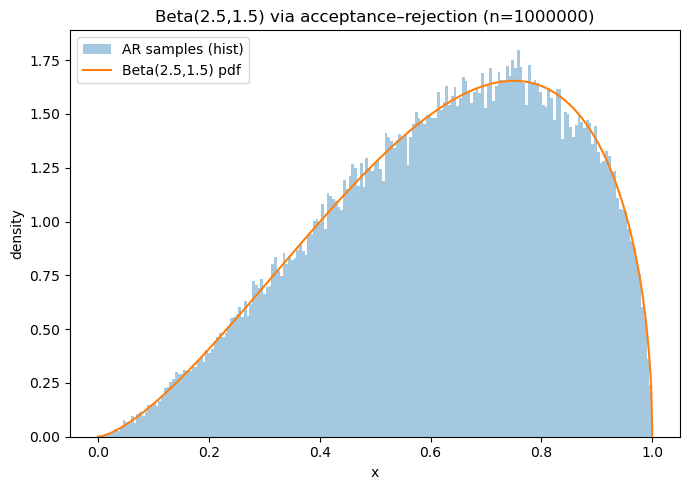

In [190]:
def beta_pdf(x, a, b):
    # pdf via Gamma functions (no SciPy needed)
    logB = math.lgamma(a) + math.lgamma(b) - math.lgamma(a + b)
    return np.exp((a - 1) * np.log(x) + (b - 1) * np.log(1 - x) - logB)

# --- generate samples ---
a, b = 2.5, 1.5
n = 1000000
samples, acc_rate = beta_ar_uniform(n, a=a, b=b, rng=rng)

# --- theoretical curve ---
grid = np.linspace(1e-6, 1 - 1e-6, 600)
pdf = beta_pdf(grid, a, b)
# --- plot: histogram vs theoretical pdf ---
plt.figure(figsize=(7,5))
plt.hist(out, bins=200, density=True, alpha=0.4, label="AR samples (hist)")
plt.plot(grid, pdf, label=f"Beta({a},{b}) pdf")
plt.xlabel("x")
plt.ylabel("density")
plt.title(f"Beta({a},{b}) via acceptance–rejection (n={n})")
plt.legend()
plt.tight_layout()
plt.show()

## Example: Gamma Distribution with $\alpha>0$